# Age Groups with Highest prevalence Tobacco usage

In [ ]:
import pandas as pd
import time

In [ ]:
# Load the dataset
df = pd.read_csv("drugs.csv")


In [ ]:
# Start measuring execution time
start_time = time.time()

# Calculating prevalence of tobacco use by age group
df['Tobacco_Usage_12_17'] = (df['Totals.Tobacco.Use Past Month.12-17'] / df['Population.12-17']) * 100
df['Tobacco_Usage_18_25'] = (df['Totals.Tobacco.Use Past Month.18-25'] / df['Population.18-25']) * 100
df['Tobacco_Usage_26_plus'] = (df['Totals.Tobacco.Use Past Month.26+'] / df['Population.26+']) * 100

# Averaging across states to get national prevalence
age_group_prevalence = {
    '12-17': df['Tobacco_Usage_12_17'].mean(),
    '18-25': df['Tobacco_Usage_18_25'].mean(),
    '26+': df['Tobacco_Usage_26_plus'].mean(),
}

# Summing total tobacco users across states
age_group_prevalence_total = {
    '12-17': df['Totals.Tobacco.Use Past Month.12-17'].sum(),
    '18-25': df['Totals.Tobacco.Use Past Month.18-25'].sum(),
    '26+': df['Totals.Tobacco.Use Past Month.26+'].sum(),
}

# Number of rows in the result
num_rows = df.shape[0]

# Number of columns in the result
num_columns = df.shape[1]

In [ ]:
# Sorting prevalence by highest percentage
sorted_prevalence_percent = sorted(age_group_prevalence.items(), key=lambda item: item[1], reverse=True)

# Sorting prevalence by highest total tobacco usage
sorted_prevalence_total = sorted(age_group_prevalence_total.items(), key=lambda item: item[1], reverse=True)

 Measures the execution time of the query, displays the first two results, and shows how many rows were returned.
Providing time and quick insights into the age group with the highest prevalence of tabbacco usage, confirming that the query was successful and efficient.

In [ ]:
# End timing
end_time = time.time()

In [ ]:
# Display results
print("Prevalence Based on Percentage of Population:")
for age_group, prevalence in sorted_prevalence_percent:
    print(f"Age Group {age_group}: {prevalence:.2f}%")

print("\nPrevalence Based on Total Tobacco Usage:")
for age_group, total_usage in sorted_prevalence_total:
    print(f"Age Group {age_group}: {total_usage:,} total users")

#Display total rows
print(f"Total rows returned: {num_rows }")

#Display total columns
print(f"Total columns returned: {num_columns}")

Prevalence Based on Percentage of Population:
Age Group 18-25: 0.04%
Age Group 26+: 0.03%
Age Group 12-17: 0.01%

Prevalence Based on Total Tobacco Usage:
Age Group 26+: 892,934 total users
Age Group 18-25: 216,092 total users
Age Group 12-17: 41,194 total users
Total rows returned: 867
Total columns returned: 56


In [ ]:
# Print execution time
print(f"Query execution time: {end_time - start_time:.4f} seconds")

Query execution time: 0.0186 seconds


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-19-2f6a993c6f1d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Age Group", y="Total Usage", data=tobacco_df, palette="Blues_r")


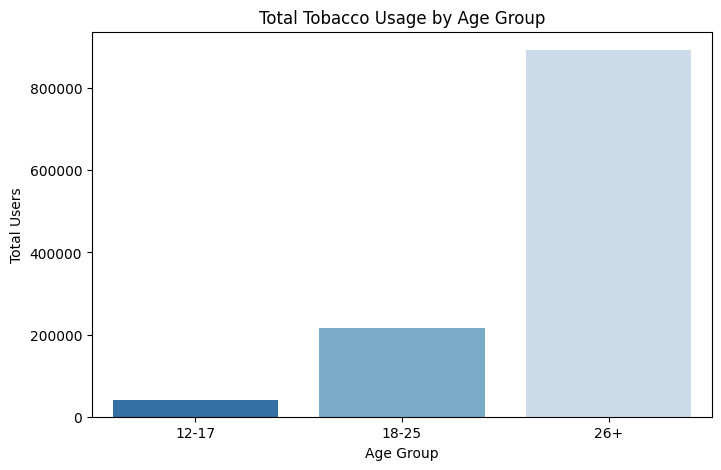

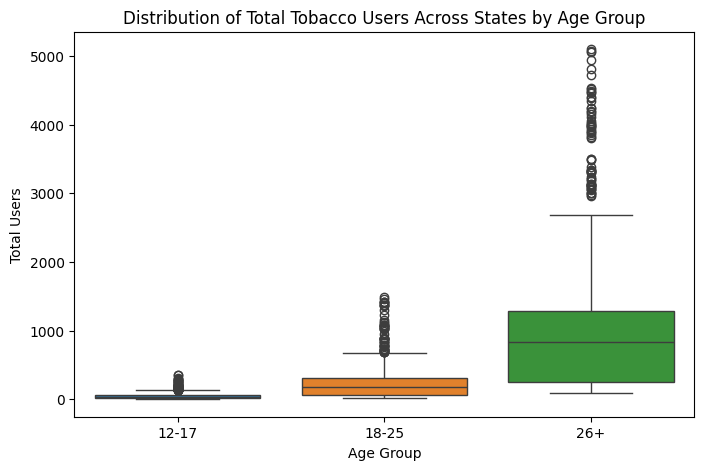

In [ ]:

# Compute the total tobacco usage  by age group across states
total_tobacco_usage = {
    "12-17": df["Totals.Tobacco.Use Past Month.12-17"].sum(),
    "18-25": df["Totals.Tobacco.Use Past Month.18-25"].sum(),
    "26+": df["Totals.Tobacco.Use Past Month.26+"].sum()
}

# Convert to DataFrame for easier visualization
tobacco_df = pd.DataFrame(total_tobacco_usage.items(), columns=["Age Group", "Total Usage"])

# Bar Chart: Total tobacco usage by age group
plt.figure(figsize=(8, 5))
sns.barplot(x="Age Group", y="Total Usage", data=tobacco_df, palette="Blues_r")
plt.title("Total Tobacco Usage by Age Group")
plt.ylabel("Total Users")
plt.xlabel("Age Group")
plt.show()

# Box Plot: Distribution of tobacco usage across states
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["Totals.Tobacco.Use Past Month.12-17",
                     "Totals.Tobacco.Use Past Month.18-25",
                     "Totals.Tobacco.Use Past Month.26+"]])
plt.xticks(ticks=[0, 1, 2], labels=["12-17", "18-25", "26+"])
plt.title("Distribution of Total Tobacco Users Across States by Age Group")
plt.ylabel("Total Users")
plt.xlabel("Age Group")
plt.show()



<ipython-input-20-b57953fb7cd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Age Group", y="Avg Usage Percentage", data=tobacco_percent_df, palette="Blues_r")


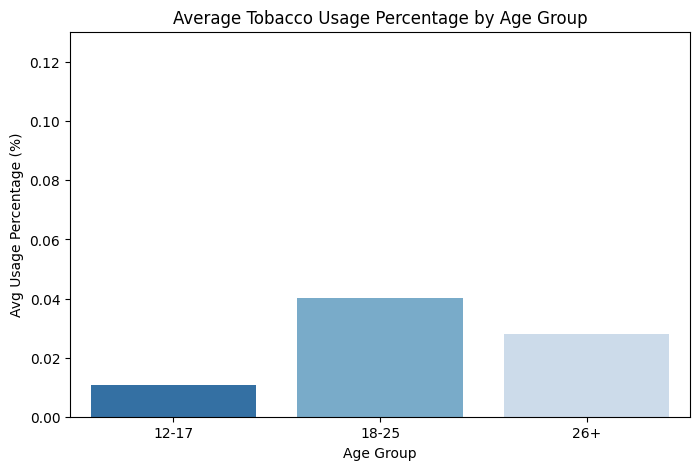

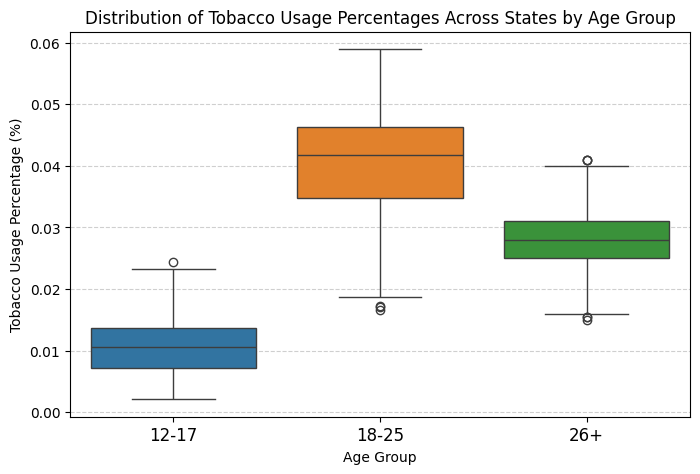

In [ ]:

# Convert the average percentage prevalence into a DataFrame for visualization
tobacco_percent_df = pd.DataFrame(age_group_prevalence.items(), columns=["Age Group", "Avg Usage Percentage"])

# Bar Plot: Average tobacco usage percentage by age group
plt.figure(figsize=(8, 5))
sns.barplot(x="Age Group", y="Avg Usage Percentage", data=tobacco_percent_df, palette="Blues_r")
plt.title("Average Tobacco Usage Percentage by Age Group")
plt.ylabel("Avg Usage Percentage (%)")
plt.xlabel("Age Group")
plt.ylim(0, max(tobacco_percent_df["Avg Usage Percentage"]) + 0.09)  # Adjust y-axis for better visibility
plt.show()

# Box Plot: Distribution of tobacco usage percentages across states by age group
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["Tobacco_Usage_12_17", "Tobacco_Usage_18_25", "Tobacco_Usage_26_plus"]])
plt.xticks(ticks=[0, 1, 2], labels=["12-17", "18-25", "26+"], fontsize=12)
plt.title("Distribution of Tobacco Usage Percentages Across States by Age Group")
plt.ylabel("Tobacco Usage Percentage (%)")
plt.xlabel("Age Group")
plt.grid(axis="y", linestyle="--", alpha=0.6)  # Add grid for readability
plt.show()
